<a href="https://colab.research.google.com/github/FGalvao77/Agrupamento-de-usuarios-de-cartao-de-credito/blob/main/Agrupamento_de_usu%C3%A1rios_de_cart%C3%A3o_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agrupamento de usuários de cartão de crédito**

---



**O que é agrupamento (clustering)?**

Compreender o seu negócio e como os clientes se relacionam com a sua empresa e o seu produto é fundamental para o desenvolvimento da melhor estratégia.

Um bom caminho a seguir para fazer isso é o agrupamento. Usado pela primeira vez no mundo do marketing, a formação de clusters vai além da propaganda e impacta o resultado geral da organização.

Clusters são formações de grupos de pessoas, produtos ou ações que compartilham algumas semelhanças. Por meio do clustering, a empresa aprimora o tipo de mensagem que envia ao público, como promoções de produtos com maior propensão de aquisição ou um serviço alinhado com o situação atual do cliente. Isso fortalece o relacionamento entre a empresa e cliente e, portanto, aumenta os lucros.

Com um mercado mais segmentado, há necessidade de produtos mais customizados e serviços, criando assim novas demandas. A análise do cliente por meio de clusters auxilia na processo de tomada de decisão melhorando toda a estratégia de atração e vendas.

Neste projeto, vamos agrupar os dados usando o algoritmo `KMeans`. Ao longo do projeto, nós irá detalhar as etapas!

- Fonte de dados:
    - [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata)

In [1]:
# importando as bibliotecas
import pandas as pd    
import numpy as np 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# # importando o conjunto de dados para google colab
# from google.colab import files
# uploaded = files.upload()

In [3]:
# # instanciando os dados da url na variável "df"
# df = pd.read_csv('/content/CC GENERAL.csv')

In [4]:
# carregando o conjunto de dados direto do meu repositório no github
df = pd.read_csv('https://raw.githubusercontent.com/FGalvao77/datasets/main/CC%20GENERAL.csv')

In [5]:
# visualizando o conjunto de dados
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
# visualizando o nomde das colunas
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

**Dicionário de dados:**

- ``CUST_ID``: Identificação do titular do cartão de crédito;<br>
- ``BALANCE``: Saldo restante na conta para fazer compras;<br>
- ``BALANCE_FREQUENCY``: com que frequência o saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência);<br>
- ``PURCHASES``: Valor das compras realizadas;<br>
- ``ONE_OFFPURCHASES``: Valor máximo da compra realizada de uma só vez;<br>
- ``INSTALL_MENTSPURCHASES``: Valor da compra parcelada;<br>
- ``CASH_ADVANCE``: Antecipado dado pelo usuário;<br>
- ``PURCHASES_FREQUENCY``: Frequência com que as compras estão sendo feitas, pontuação entre 0 e 1 (1 = frequentemente comprado, 0 = não frequentemente comprado);<br>
- ``ONEOFF_PURCHASES_FREQUENCY``: Com que frequência as compras acontecem de uma vez (1 = frequentemente comprado, 0 = não frequentemente comprado);<br>
- ``PURCHASES_INSTALLMENTS_FREQUENCY``: Frequência com que as compras a prazo estão sendo feitas (1 = frequentemente, 0 = não frequentemente);<br>
- ``CASH_ADVANCE_FREQUENCY``: Frequência com que o dinheiro antecipado está sendo pago;<br>
- ``CASH_ADVANCE_TRX``: Número de transações feitas com “Dinheiro adiantado”;<br>
- ``PURCHASES_TRX``: Número de transações de compras feitas;<br>
- ``CREDIT_LIMIT``: Limite do cartão de crédito;<br>
- ``PAYMENTS``: Valor do pagamento feito pelo usuário;<br>
- ``MINIMUM_PAYMENTS``: Valor mínimo dos pagamentos feitos pelo usuário;<br>
- ``PRC_FULL_PAYMENT``: Porcentagem do pagamento total pago pelo usuário;<br>
- ``TENURE:``Posse do serviço de cartão de crédito para o usuário.

**OBJETIVO DO TRABALHO:** Desenvolvimento de uma segmentação de clientes para definir a estratégia de marketing.

## 1. **Análise exploratória de dados**

Essencial em qualquer projeto de ciência de dados, a análise exploratória de dados tem como objetivo:
- para entender melhor seus dados;
- para obter informações e insights;
- para avaliar se o conjunto de dados fornecido é adequado para a tarefa.

Vamos começar.

In [7]:
# dimensão do conjunto de dados
df.shape

(8950, 18)

In [8]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
# tipo de dado das colunas
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [10]:
# visualizando a presença de valores nulos/faltantes
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# visualizando a média em porcentagem de valores nulos nas colunas
df.isnull().mean() * 100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [12]:
# visualizando a procentagem representativa de dados nulos/faltantes em relação ao total do conjunto de dados
df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].isnull().sum() / df.shape[0] * 100

CREDIT_LIMIT        0.011173
MINIMUM_PAYMENTS    3.497207
dtype: float64

In [13]:
# importando as bibliotecas para visualização gráfica
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

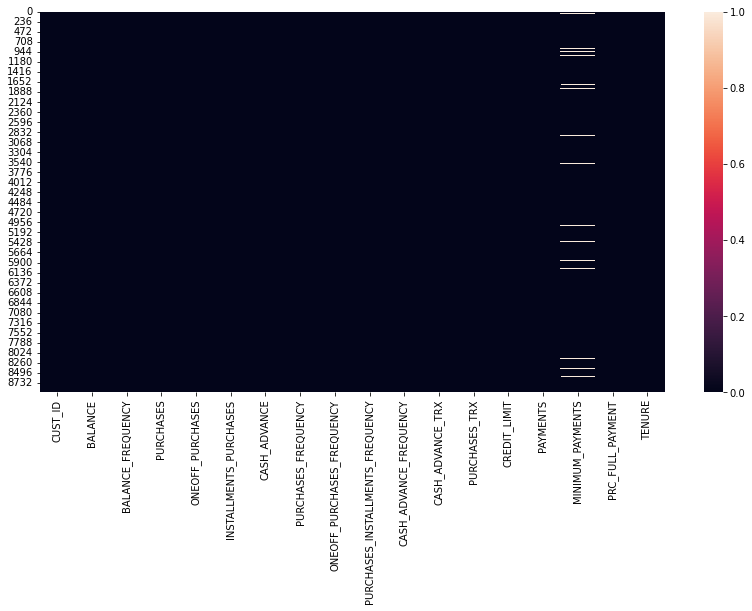

In [14]:
# visualizando graficamente se há presença de valores nulos
plt.figure(figsize=[14, 7])
sns.heatmap(df.isnull());

In [15]:
# eliminando valores nulos do conjunto de dados
df = df.dropna()

In [16]:
# visualizando a média em porcentagem de valores nulos nas colunas
df.isnull().mean() * 100

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

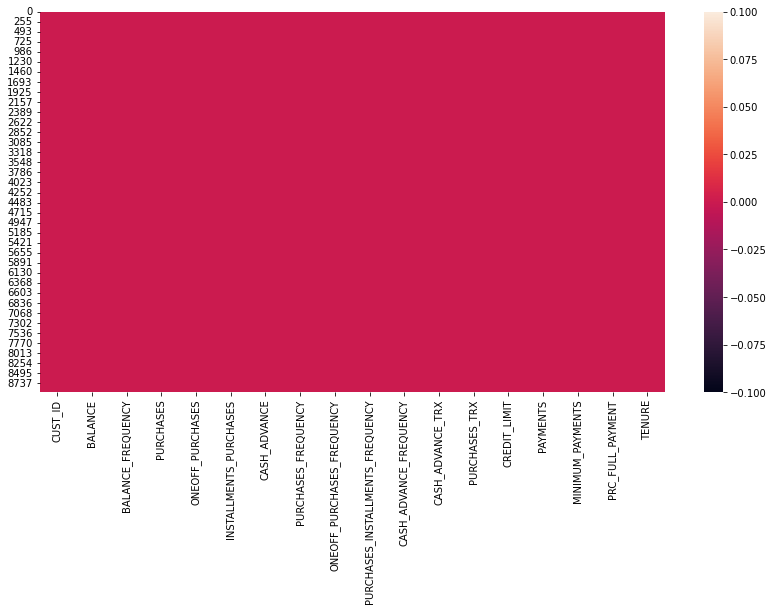

In [17]:
# visualizando graficamente se há presença de valores nulos
plt.figure(figsize=[14, 7])
sns.heatmap(df.isnull());

In [18]:
# dados estatísticos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


> Temos um resumo estatístico sobre os valores de nossas variáveis. Isso é essencial para verificar as medidas de posição, dispersão e separação.

In [19]:
# correlação entre as variáveis
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


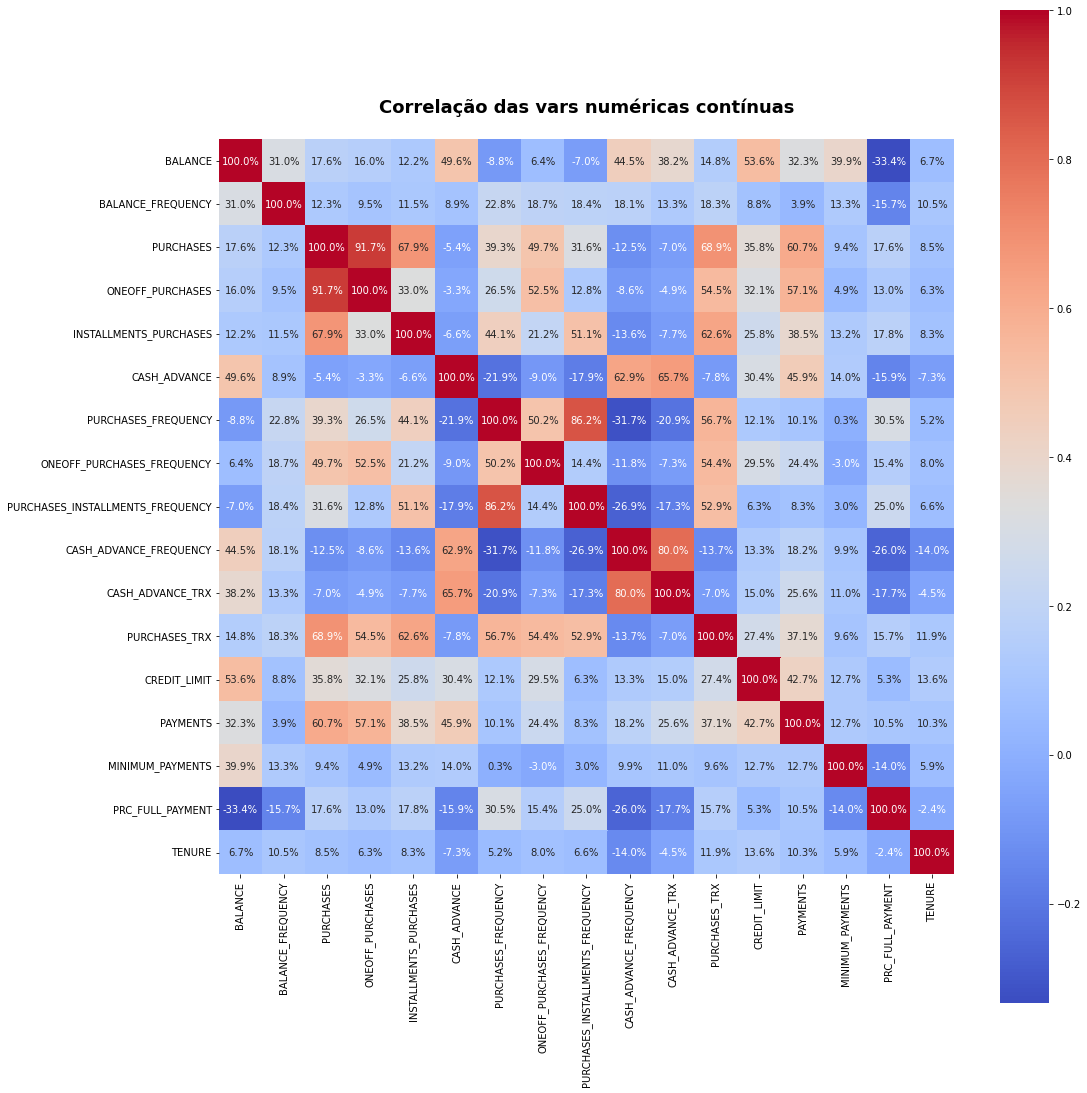

In [20]:
# gráfico de calor das correlações entre as variáveis numéricas
corr = df.corr()
plt.figure(figsize = (16, 16))
plt.title('Correlação das vars numéricas contínuas\n', 
                      {'fontsize': 18,'fontweight': 'bold'})
sns.heatmap(corr, fmt = '0.1%', annot = True, square = True,
            cmap='coolwarm')
plt.tight_layout();

> Para análise exploratória, é interessante traçar o `gráfico de correlação`. Mesmo sendo uma aplicação `não supervisionada`, este gráfico pode nos auxiliar a dar um melhor pré-processamento e tratamento aos dados, como decidir sobre o uso de um algoritmo `PCA`.

Se você quiser saber mais sobre o PCA, verifique a documentação [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

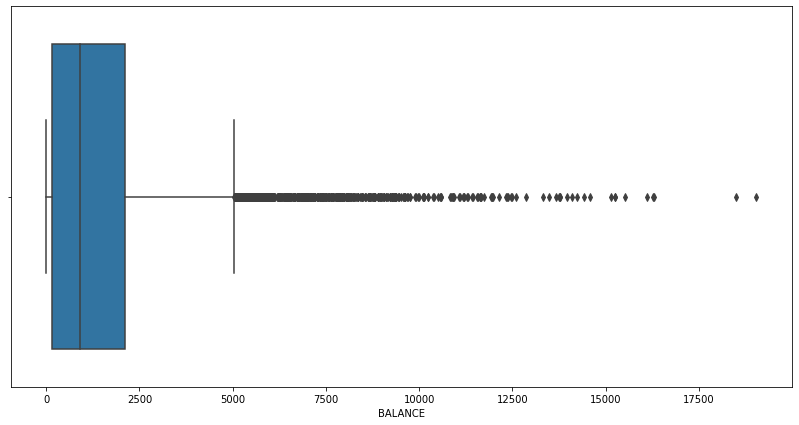

In [21]:
# verificando a presença de "outliers" da feature (coluna) "BALANCE"
plt.figure(figsize=[14, 7])
sns.boxplot(x= 'BALANCE', data=df);

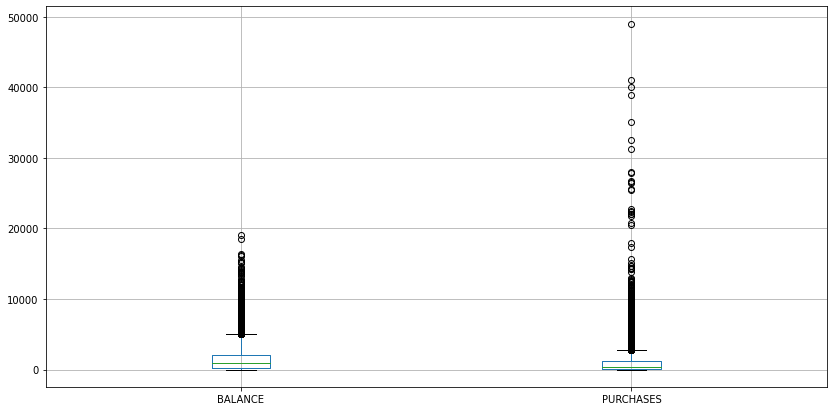

In [22]:
# verificando a presença de "outliers" da feature (coluna) "BALANCE" e "PURCHASES"
plt.figure(figsize=[14, 7])
df.boxplot(column = ['BALANCE', 'PURCHASES']);

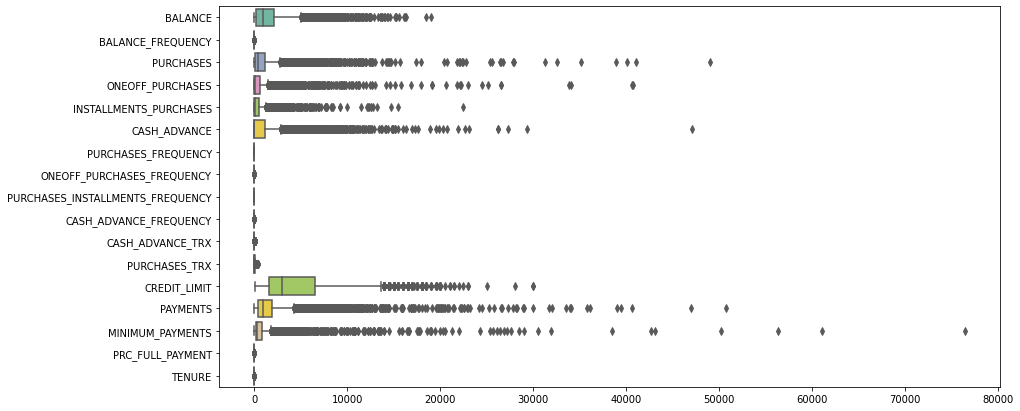

In [23]:
# verificando a presença de "outliers" nas features (colunas) do conjunto de dados
plt.figure(figsize = (14, 7))
sns.boxplot(data = df, orient = 'h', palette = 'Set2');

> Quase todas as colunas têm muitos valores discrepantes. E isso é muito óbvio, já que são dados financeiros e incluem riqueza de indivíduos. A riqueza é distribuída desigualmente entre os indivíduos e, portanto, os dados relacionados à compra também têm muitos valores discrepantes.

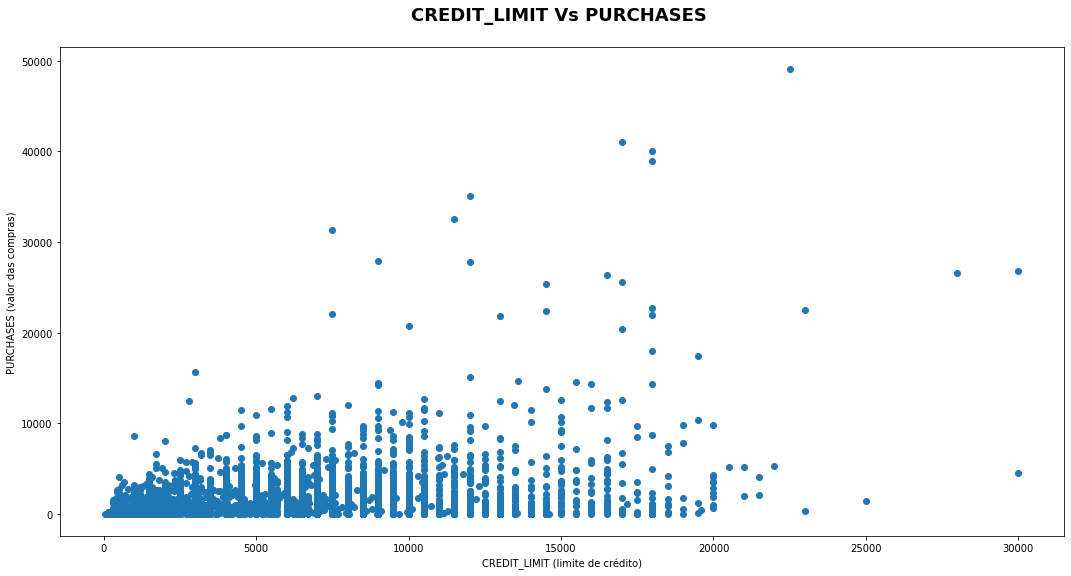

In [24]:
# gráfico CREDIT_LIMIT (limite de crédito) Vs PURCHASES (valor das compras)
plt.figure(figsize=(18, 9))
plt.scatter(df['CREDIT_LIMIT'], df['PURCHASES'])
plt.xlabel('CREDIT_LIMIT (limite de crédito)')
plt.ylabel('PURCHASES (valor das compras)')
plt.title('CREDIT_LIMIT Vs PURCHASES \n',
           {'fontsize': 18,'fontweight': 'bold'});

> O `gráfico de dispersão` é frequentemente usado em projetos de cluster porque nos mostra como os dados são distribuídos na dimensão plana. Isso ajuda a começar a pensar sobre o número de clusters no problema, ou até mesmo verifique se nossos dados são adequados para a tarefa.

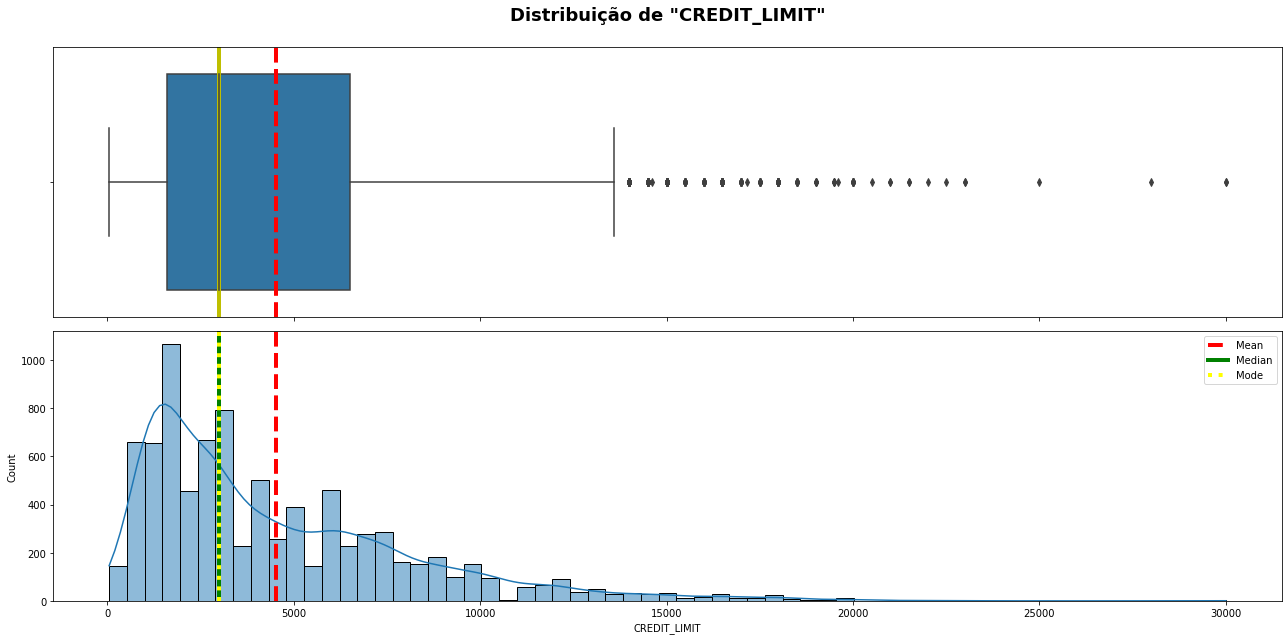

In [25]:
# plotando gráficos - boxplot e histograma da variável "CREDIT_LIMIT" (limite de crédito)
mean = df['CREDIT_LIMIT'].mean()
median = df['CREDIT_LIMIT'].median()
mode = df['CREDIT_LIMIT'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize = (18, 9))

sns.boxplot(data=df, x='CREDIT_LIMIT', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--', linewidth=4)
ax_box.axvline(median, color='g', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='y', linestyle='-', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('Distribuição de "CREDIT_LIMIT"\n',
                 {'fontsize': 18,'fontweight': 'bold'})

sns.histplot(data=df, x='CREDIT_LIMIT', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='red', linestyle='--', label='Mean', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Median', linewidth=4)
ax_hist.axvline(mode, color='yellow', linestyle=':', label='Mode', linewidth=4)

ax_hist.legend()
plt.tight_layout();

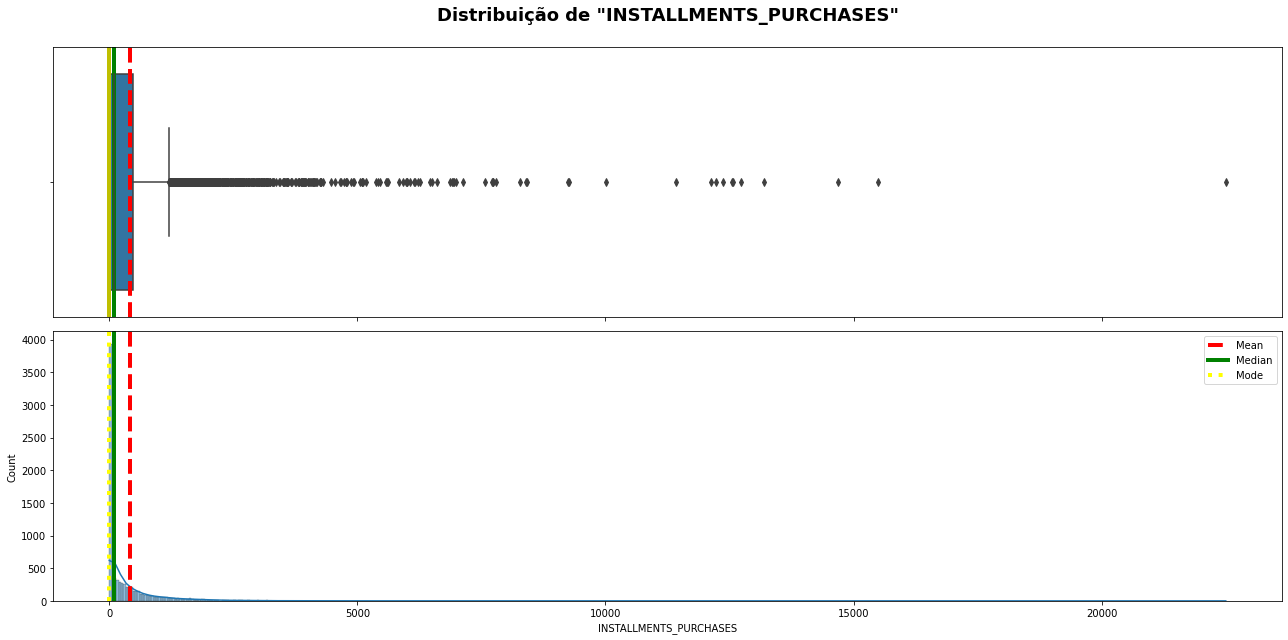

In [26]:
# plotando gráficos - boxplot e histograma da variável "INSTALLMENTS_PURCHASES" (valor da compra parcelada)
mean = df['INSTALLMENTS_PURCHASES'].mean()
median = df['INSTALLMENTS_PURCHASES'].median()
mode = df['INSTALLMENTS_PURCHASES'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize = (18, 9))

sns.boxplot(data=df, x='INSTALLMENTS_PURCHASES', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--', linewidth=4)
ax_box.axvline(median, color='g', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='y', linestyle='-', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('Distribuição de "INSTALLMENTS_PURCHASES"\n',
                 {'fontsize': 18,'fontweight': 'bold'})

sns.histplot(data=df, x='INSTALLMENTS_PURCHASES', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='red', linestyle='--', label='Mean', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Median', linewidth=4)
ax_hist.axvline(mode, color='yellow', linestyle=':', label='Mode', linewidth=4)

ax_hist.legend()
plt.tight_layout();

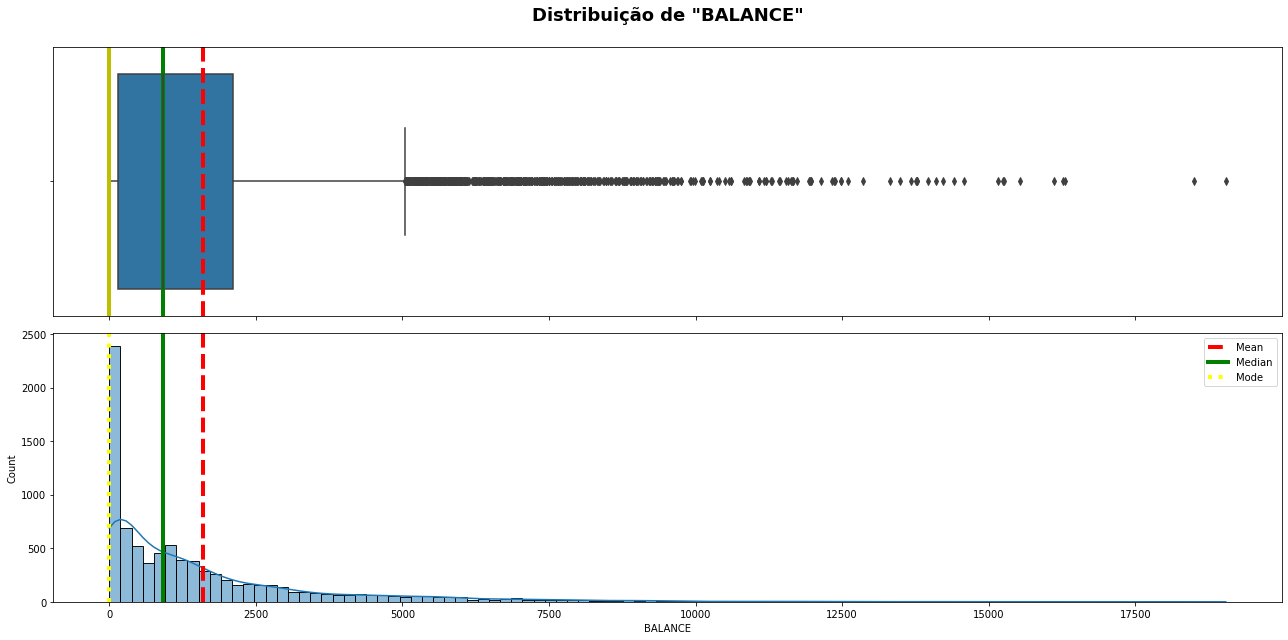

In [27]:
# plotando gráficos - boxplot e histograma da variável "BALANCE" (saldo restante na conta para fazer compras)
mean = df['BALANCE'].mean()
median = df['BALANCE'].median()
mode = df['BALANCE'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, 
                                      figsize = (18, 9))

sns.boxplot(data = df, x = 'BALANCE', ax = ax_box)
ax_box.axvline(mean, color = 'r', linestyle = '--', linewidth = 4)
ax_box.axvline(median, color = 'g', linestyle = '-', linewidth = 4)
ax_box.axvline(mode, color = 'y', linestyle = '-', linewidth = 4)
ax_box.set(xlabel = '')
ax_box.set_title('Distribuição de "BALANCE"\n',
                 {'fontsize': 18,'fontweight': 'bold'})

sns.histplot(data = df, x = 'BALANCE', ax = ax_hist, kde = True)
ax_hist.axvline(mean, color = 'red', linestyle = '--', label = 'Mean', linewidth = 4)
ax_hist.axvline(median, color = 'green', linestyle = '-', label = 'Median', linewidth = 4)
ax_hist.axvline(mode, color = 'yellow', linestyle = ':', label = 'Mode', linewidth = 4)

ax_hist.legend()
plt.tight_layout();

> Os gráficos acima o `boxplot` e o `histograma` são essenciais para análises exploratórias.
- o boxplot é muito bom para detecção de outliers e;
- o histograma é ideal para visualizarmos como nossos dados estão distribuídos.

Isso nos ajudará a determinar o melhor tratamento para nossos dados.

## 2. **Aprendizado de máquina - modelo de cluster**

Usamos segmentação para fazer análise de grupo. Esta análise é a prática de agrupar vários dados e separando-os em grupos de dados semelhantes. Explorando esses diferentes grupos e determinar como eles são semelhantes, você pode aprender muito sobre o conjunto de dados desorganizado que tínhamos no
primeiro lugar. Esse entendimento pode ajudar a tomar melhores decisões.
Link de documentação.

**KMeans**

O objetivo no agrupamento `k-means` é pegar alguns pontos no espaço e colocá-los em agrupamentos **k** (_k é um número que escolhemos arbitrariamente_). Esses k grupos são definidos por um ponto no centro, conhecido como _centróide_.

Os pontos próximos a este centroide se juntarão a ele com base em alguma métrica de distância. Este centro de grupo (centróide) é a média a partir da qual k-means recebe seu nome.

Uma métrica de distância amplamente usada é a `distância euclidiana`. Existem outras métricas, mas por enquanto não iremos nos aprofundar nas demais métricas.

- Saiba mais em:    
 - [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 
 - [Distância Euclidiana](https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_euclidiana).
<br><br>

Segue o passo a passo para desenvolver algoritmos não supervisionados é:
- Importe os pacotes necessários;
- Padronize ou normalize os dados para que fiquem na mesma escala;
- Escolha um número ideal de grupos para agrupar usando o método do cotovelo e treine o modelo;
- Corroborar o resultado do método do cotovelo com outra métrica, por exemplo a pontuação da [silhueta](https://en.wikipedia.org/wiki/Silhouette_(clustering));
- Faça previsões e avalie os resultados.

In [28]:
# importando as bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [29]:
# eliminando a coluna "CUST_ID", já que a mesma não agregra nada a análise
df = df.drop('CUST_ID', axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [30]:
# removendo valores "NaN"
df.dropna(inplace = True)

In [31]:
# realizando o tratamento de escalonamento dos dados
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df)

In [32]:
# visualizando a dimensão do conjunto de dados após o escalonamento
df_scaled.shape

(8636, 17)

In [33]:
# visualizando o conjunto de dados
df_scaled[:3]

array([[-0.74462486, -0.37004679, -0.42918384, -0.35916028, -0.35482593,
        -0.46865549, -0.82076881, -0.68627958, -0.71717894, -0.68195251,
        -0.47943688, -0.51762292, -0.96257545, -0.54394191, -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, -0.35916028, -0.45883904,
         2.56855647, -1.2361389 , -0.68627958, -0.92652157,  0.55702219,
         0.09925796, -0.59705416,  0.67720406,  0.79685226,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251,  0.09990947, -0.45883904,
        -0.46865549,  1.25607662,  2.6466512 , -0.92652157, -0.68195251,
        -0.47943688, -0.12046673,  0.81385235, -0.39950328, -0.09990611,
        -0.53772694,  0.35518066]])

In [34]:
# importando a biblioteca
from sklearn.cluster import KMeans

In [35]:
# instanciando o modelo
k_means = KMeans(random_state = 123)

In [36]:
# instalando a biblioteca
!pip install -U yellowbrick

In [37]:
# importando a biblioteca para plotagem da "curva do cotovelo"
from yellowbrick.cluster import KElbowVisualizer

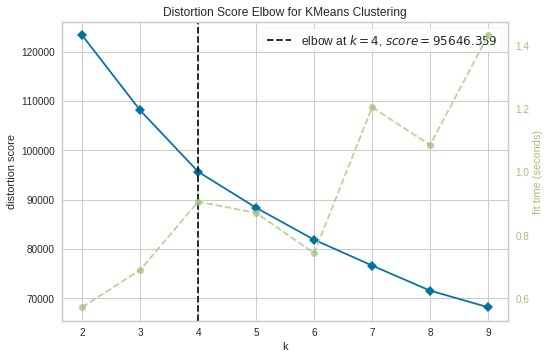

In [38]:
# visualizando a "curva do cotovelo"
visualizer = KElbowVisualizer(k_means, k=(2,10), timings= True)
visualizer.fit(df_scaled) 
visualizer.show();

> Realizando somente o escalonamento dos dados, o gráfico acima nos mostra que o melhor número de cluster é **4**.

Mas vamos aplicar a redução da dimensionalidade do conjunto de dados e, posteriormente visualizarmos o gráfico da `curva do cotovelo`.

In [39]:
# importando a biblioteca para redução da dimensionalidade
from sklearn.decomposition import PCA

In [40]:
# instanciando o modelo de redução da dimensionalidade
pca = PCA()

# aplicando o modelo de redução da dimensionalidade
pca.fit(df_scaled)

PCA()

In [41]:
# visualizando a variância das features
exp_var = pca.explained_variance_
exp_var

array([4.62983620e+00, 3.46403341e+00, 1.51629231e+00, 1.28766257e+00,
       1.06714866e+00, 9.71286112e-01, 8.35848726e-01, 7.15907723e-01,
       6.25960921e-01, 5.23917010e-01, 4.01893153e-01, 3.01706671e-01,
       2.42568833e-01, 2.00395358e-01, 1.71396366e-01, 4.61029927e-02,
       1.17321400e-05])

In [42]:
# quantidade de variação que se encontra no eixo de cada componente principal
var_ratio = pca.explained_variance_ratio_
var_ratio

array([2.72311770e-01, 2.03743076e-01, 8.91833372e-02, 7.57360860e-02,
       6.27661816e-02, 5.71278613e-02, 4.91618788e-02, 4.21073427e-02,
       3.68169669e-02, 3.08150790e-02, 2.36380362e-02, 1.77453962e-02,
       1.42671026e-02, 1.17865972e-02, 1.00809717e-02, 2.71162672e-03,
       6.90045972e-07])

> Saiba mais em:      
 - [Variation ratio](https://en.wikipedia.org/wiki/Variation_ratio)

In [43]:
# soma acumulativa
cumsum = np.cumsum(var_ratio)
cumsum

array([0.27231177, 0.47605485, 0.56523818, 0.64097427, 0.70374045,
       0.76086831, 0.81003019, 0.85213753, 0.8889545 , 0.91976958,
       0.94340762, 0.96115301, 0.97542011, 0.98720671, 0.99728768,
       0.99999931, 1.        ])

> Saiba mais em:         
- [Soma Cumulativa](https://docs.tibco.com/pub/spotfire_web_player/6.0.0-november-2013/pt-BR/WebHelp/GUID-A72C6670-9569-4542-9EA5-BF311478C0F9.html)
- [numpy.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)

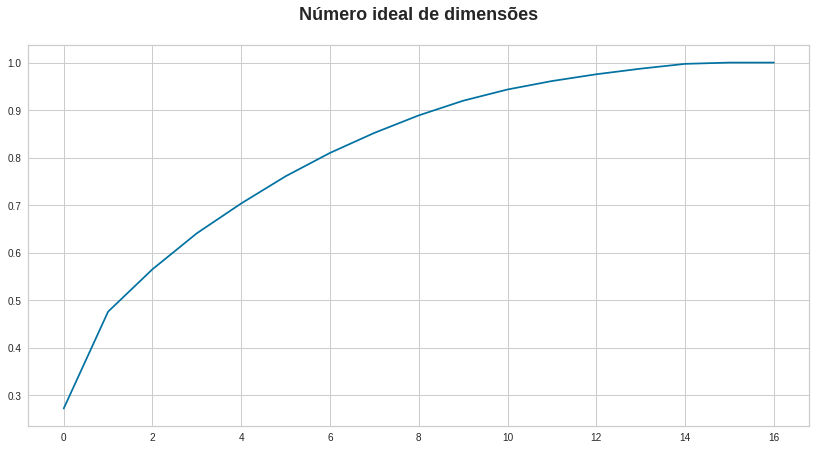

In [44]:
# visualizando o número ideal de dimensões
plt.figure(figsize = (14, 7))
plt.title('Número ideal de dimensões\n', 
                      {'fontsize': 18,'fontweight': 'bold'})
plt.plot(cumsum);

> Como podemos ver que a variância explicada começa a diminuir entre 8 e 10 números de dimensões. Portanto, o número de dimensões deve ser 8, 9 ou 10.

In [45]:
# aplicando a redução da dimensionalidade e passando como argumentos "n_components=9"
pca_final = PCA(n_components = 9).fit(df_scaled)
pca_final

PCA(n_components=9)

In [46]:
# aplicando o PCA final
pca_final.explained_variance_

array([4.6298362 , 3.46403341, 1.51629231, 1.28766257, 1.06714866,
       0.97128611, 0.83584873, 0.71590772, 0.62596092])

In [47]:
# visualizando a razão da variância
pca_final.explained_variance_ratio_

array([0.27231177, 0.20374308, 0.08918334, 0.07573609, 0.06276618,
       0.05712786, 0.04916188, 0.04210734, 0.03681697])

In [48]:
# aplicando o modelo final do PCA nos dados escalonados
reduced_cr = pca_final.fit_transform(df_scaled)

In [49]:
# criando um dataframe com o número de dimensões
dimensions = pd.DataFrame(reduced_cr)
dimensions.columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

# visualizando o dataframe criado
dimensions

,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857
...,...,...,...,...,...,...,...,...,...
8631,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848,-0.870622,-0.590283
8632,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426,-0.210773,1.342838
8633,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757,-0.630976,0.558226
8634,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810,-0.263088,0.972588


In [50]:
# from sklearn.cluster import KMeans

# instanciando o k-means com 3 clusters
k_means = KMeans(n_clusters = 3, random_state = 123)

# aplicando o modelo no dataframe "dimensions"
k_means.fit(dimensions)

KMeans(n_clusters=3, random_state=123)

In [51]:
# visualizando os centróides
k_means.cluster_centers_

array([[-8.31128955e-01,  2.99567567e+00, -2.08099075e-01,
        -3.53767194e-01,  2.47316511e-02, -1.43071296e-01,
        -1.45897313e-01,  3.63307696e-02,  4.08330733e-02],
       [ 3.75016865e+00, -1.29314577e-01,  3.69360413e-02,
         1.23168947e-01, -3.17404207e-01, -5.41097593e-02,
        -1.83853734e-01,  1.43236431e-03, -1.89476274e-01],
       [-5.95824620e-01, -7.47179571e-01,  4.58597901e-02,
         6.49061336e-02,  6.22314731e-02,  4.87200630e-02,
         7.75052531e-02, -9.71041658e-03,  3.04039038e-02]])

In [52]:
# vamos tentar com clusters 4,5,6,7,8,9
k_means4 = KMeans(n_clusters = 4,random_state = 123).fit(dimensions)
k_means5 = KMeans(n_clusters = 5,random_state = 123).fit(dimensions)
k_means6 = KMeans(n_clusters = 6,random_state = 123).fit(dimensions)
k_means7 = KMeans(n_clusters = 7,random_state = 123).fit(dimensions)
k_means8 = KMeans(n_clusters = 8,random_state = 123).fit(dimensions)
k_means9 = KMeans(n_clusters = 9,random_state = 123).fit(dimensions)

In [53]:
labels = k_means.labels_

df['3_clusters'] = k_means.labels_

In [54]:
df['4_clusters'] = k_means4.labels_
df['5_clusters'] = k_means5.labels_
df['6_clusters'] = k_means6.labels_
df['7_clusters'] = k_means7.labels_
df['8_clusters'] = k_means8.labels_
df['9_clusters'] = k_means9.labels_

In [55]:
df['3_clusters'].value_counts()

2    5859
0    1517
1    1260
Name: 3_clusters, dtype: int64

In [56]:
df['4_clusters'].value_counts()

3    3917
1    3293
0    1171
2     255
Name: 4_clusters, dtype: int64

In [57]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2,3,3,5,5,2,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,0,1,0,2,7,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2,1,4,2,6,4,7
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2,3,3,5,5,2,5
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,2,3,3,1,4,0,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2,1,0,3,4,0,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2,1,0,3,4,0,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2,3,3,5,4,0,6


In [58]:
# instalando a biblioteca
!pip install -U yellowbrick

In [59]:
from yellowbrick.cluster import KElbowVisualizer

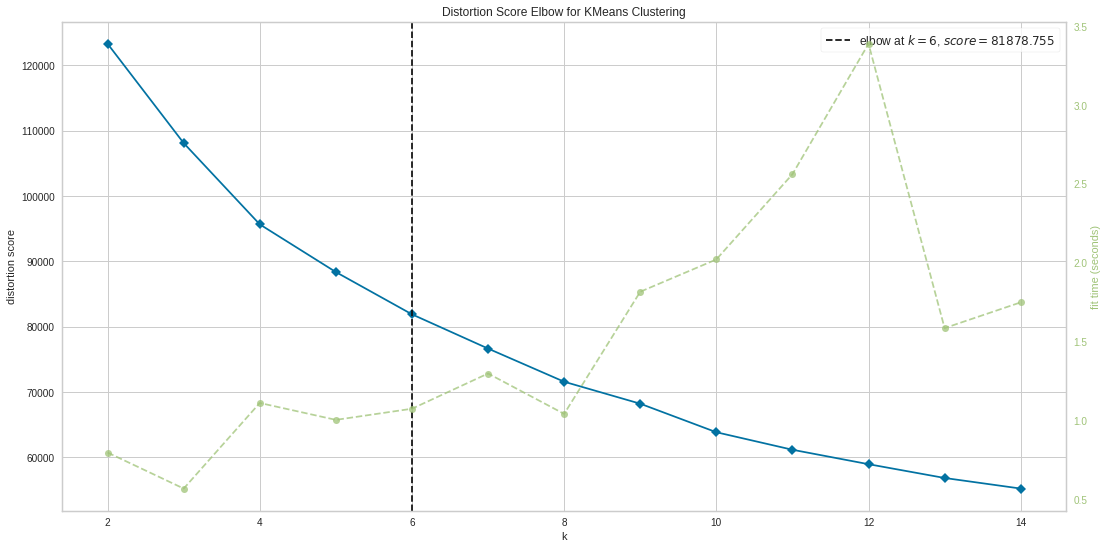

In [60]:
# plotando o gráfico - "curva do cotovelo"
plt.figure(figsize = (18, 9))
visualizer = KElbowVisualizer(k_means, k = (2, 15), timings = True)
visualizer.fit(df_scaled)
visualizer.show();

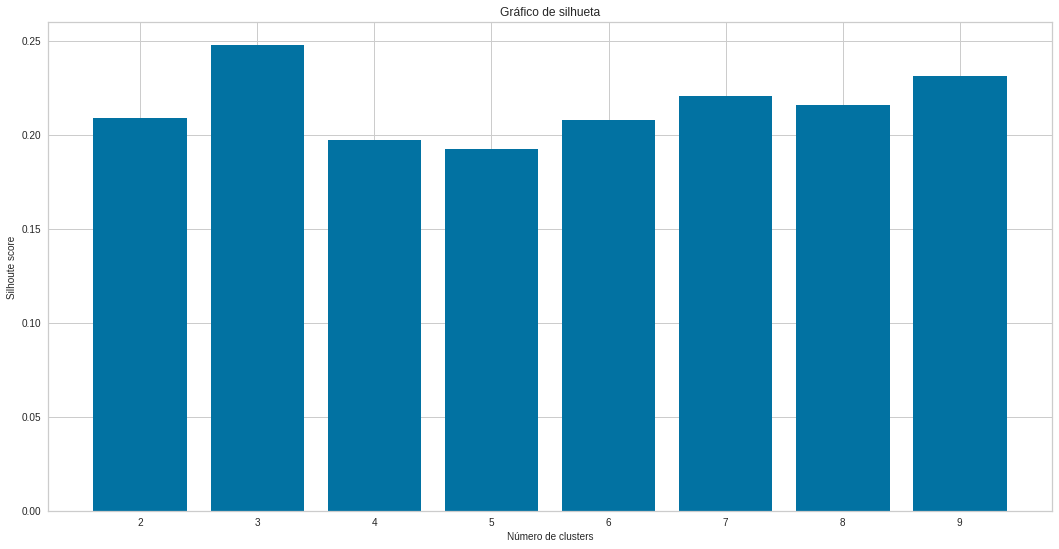

In [61]:
silhouette_scores = []
plt.figure(figsize=(18, 9))

for n_cluster in range(2, 10):
    silhouette_scores.append(
        silhouette_score(df_scaled, 
                         KMeans(n_clusters = n_cluster).fit_predict(df_scaled)))

k = range(2, 10)
plt.bar(k, silhouette_scores)
plt.xlabel('Número de clusters', fontsize=10)
plt.ylabel('Silhoute score', fontsize=10)
plt.title('Gráfico de silhueta')
plt.show();

In [62]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,2,3,3,5,5,2,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,0,1,0,2,7,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,2,1,4,2,6,4,7
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,2,3,3,5,5,2,5
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2,1,0,3,0,1,0


In [63]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(df_scaled)

k_means_cluster_centers = kmeans.cluster_centers_
print(k_means_cluster_centers)

[[-0.37022291 -0.17051327 -0.2333286  -0.20440425 -0.17590129 -0.31273727
  -0.0586752  -0.23284887 -0.0477534  -0.33701019 -0.30181767 -0.24484753
  -0.34281906 -0.28790463 -0.13966074  0.01656526 -0.02441135]
 [ 0.30806683  0.41987159  1.51249481  1.2637689   1.25304352 -0.24785492
   1.13337888  1.53687011  0.95942584 -0.36245071 -0.25340661  1.66939261
   0.88962389  0.82535039  0.15902399  0.46951072  0.29533849]
 [ 1.14594568  0.31295614 -0.2966128  -0.21252332 -0.31078874  1.3606683
  -0.65654274 -0.31724378 -0.56293893  1.53997032  1.32413741 -0.37480383
   0.59406479  0.4384467   0.39920521 -0.4247714  -0.13698355]]


In [64]:
len(k_means_cluster_centers)

3

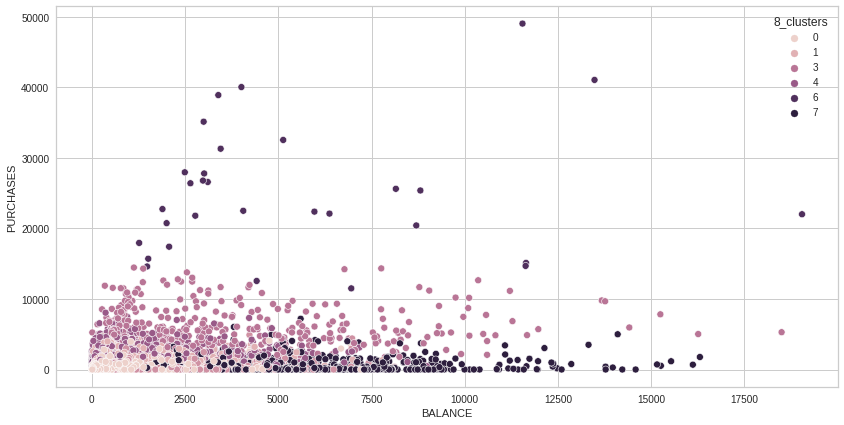

In [65]:
plt.figure(figsize = (14, 7))
sns.scatterplot(x = 'BALANCE', y = 'PURCHASES', 
                data = df, hue = '8_clusters');

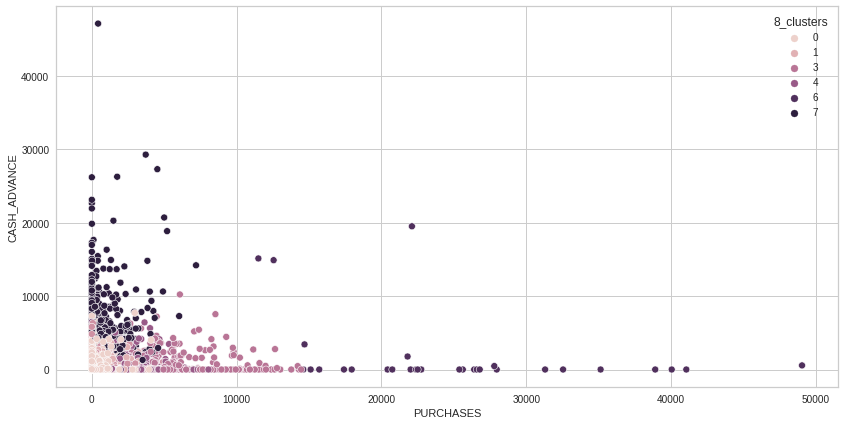

In [66]:
plt.figure(figsize = (14, 7))
sns.scatterplot(y = 'CASH_ADVANCE', x = 'PURCHASES', 
                data = df, hue = '8_clusters');

In [67]:
print(df['8_clusters'].value_counts() / sum(df['8_clusters'].value_counts()))

2    0.314150
1    0.223020
4    0.125637
5    0.124247
7    0.097267
0    0.068666
3    0.043539
6    0.003474
Name: 8_clusters, dtype: float64


In [68]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dimensions, labels = k_means.labels_)
score

0.22058012510442526

In [69]:
cluster_range = range(2,20)
variance = []

for num_clusters in cluster_range:
    cluster = KMeans(num_clusters)
    cluster.fit(dimensions)
    variance.append(cluster.inertia_)

In [70]:
variance

[107083.35142169603,
 92014.63570586042,
 79730.75228833733,
 72696.06414623617,
 66119.03537939515,
 60828.723245471614,
 56374.6965470742,
 52058.67753214497,
 49076.88929578662,
 46646.17791380756,
 44770.380806629444,
 43038.759573102245,
 41523.0676367818,
 40307.021586018884,
 39181.41195413777,
 38095.29731470418,
 36866.01570100927,
 35834.18803084875]

In [71]:
cluster_df = pd.DataFrame({'Cluster_no' : range(2,20), 
                           'unexplained_variance': variance})
cluster_df.head(10)

,Cluster_no,unexplained_variance
0,2,107083.351422
1,3,92014.635706
2,4,79730.752288
3,5,72696.064146
4,6,66119.035379
5,7,60828.723245
6,8,56374.696547
7,9,52058.677532
8,10,49076.889296
9,11,46646.177914


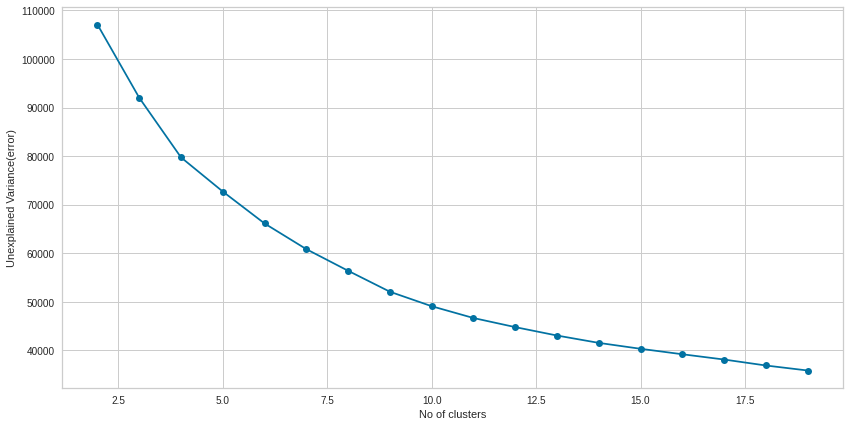

In [72]:
plt.figure(figsize = (14, 7))
plt.plot(cluster_df.Cluster_no, cluster_df.unexplained_variance, marker = 'o')
plt.xlabel('No of clusters')
plt.ylabel('Unexplained Variance(error)')
plt.grid('True');

> Como podemos ver, a taxa de decréscimo dos valores de inércia começa a diminuir quando atingimos 8 ou 9 clusters. Isso significa que 8 é o número ideal de clusters.